## Import Excel sheet to Python using Pandas

## `melt()` - Transform a DataFrame from wide format to long format

The dataframe now in a wide format with times as column names, we want to expand these times to make them a column as well. We can use `melt()` to do that. 

In [1]:
import pandas as pd
df_plot1 = pd.read_excel("data/paper01_leukaemia_fig03_data.xlsx", sheet_name="Sheet1")

# get all the time values to a list, we need to use it in the melt function
time_values = df_plot1.columns.tolist()[1:]

# melt function, id_var is the column we keep as the same, value_vars is the list we want to expand 
melted_df_plot1 = pd.melt(df_plot1, id_vars=["Time (minutes)"], value_vars=time_values)

# set new column names
new_column_names = ['category', 'time', 'OCR']
melted_df_plot1.columns = new_column_names
melted_df_plot1['time'] = pd.to_numeric(melted_df_plot1['time'])
melted_df_plot1['time'] = melted_df_plot1['time'].round(2)

In [2]:
melted_df_plot1

,category,time,OCR
0,NTC#1,1.30,48.347040
1,NTC#1,1.30,46.399661
2,NTC#1,1.30,54.448673
3,NTC#1,1.30,49.802903
4,NTC#1,1.30,47.983328
...,...,...,...
355,PIK3CG#2,72.44,2.488565
356,PIK3CG#2,72.44,1.666430
357,PIK3CG#2,72.44,4.822401
358,PIK3CG#2,72.44,12.160756


## Now it is time for you to create below figure

![05-fig-01](figs/05_addlabel_fig_01.png)

In [3]:
df_plot2 = pd.read_excel("data/paper01_leukaemia_fig03_data.xlsx", sheet_name="Sheet2")

new_name = {'Unnamed: 0': 'category'}
df_plot2 = df_plot2.rename(columns=new_name)

melted_df_plot2 = pd.melt(df_plot2, id_vars=["category"], value_vars=['Basal', 'Maximal', 'ATP'])
melted_df_plot2.head()

,category,variable,value
0,NTC#1,Basal,37.915752
1,NTC#1,Basal,30.244621
2,NTC#1,Basal,37.439465
3,NTC#1,Basal,35.119595
4,NTC#1,Basal,33.302414


/tmp/ipykernel_2108/4122130879.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


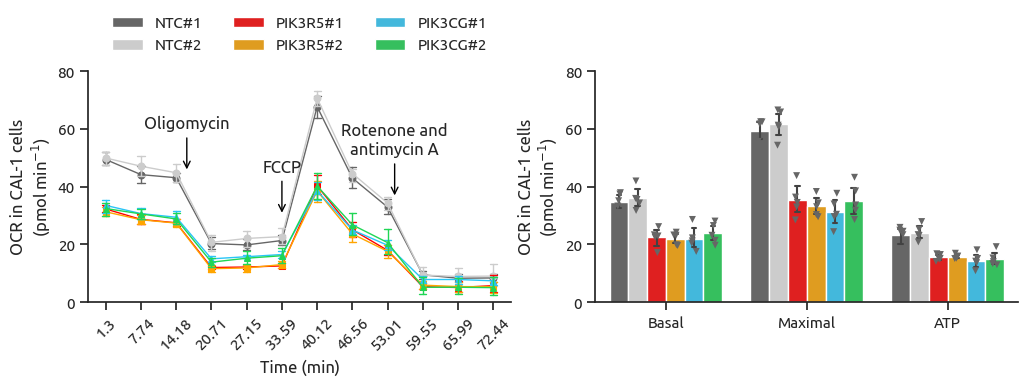

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")
plt.rcParams['font.family'] = 'Ubuntu'

fig = plt.figure(figsize=(12,3))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

category_colours = {
    'NTC#1': '.4',
    'NTC#2': '.8',
    'PIK3R5#1': '#ff0000',
    'PIK3R5#2': '#ffa500',
    'PIK3CG#1': '#29c5f6',
    'PIK3CG#2': '#1fd655'
}

category_colours2 = {
    'NTC#1': '.4',
    'NTC#2': '.4',
    'PIK3R5#1': '.4',
    'PIK3R5#2': '.4',
    'PIK3CG#1': '.4',
    'PIK3CG#2': '.4'
}

markers1 = ['o', 'o', 's', 's', '^', '^']
markers2 = {
    'NTC#1': 'o',
    'NTC#2': 'o',
    'PIK3R5#1': '^',
    'PIK3R5#2': '^',
    'PIK3CG#1': 'v',
    'PIK3CG#2': 'v'
}

sns.pointplot(
    data=melted_df_plot1, x="time", y="OCR", hue="category",
    capsize=.2, legend=False, palette=category_colours, linewidth=1,
    ax=ax1, markers=markers1, markersize=5
)

sns.barplot(
    data=melted_df_plot2, x="variable", y="value", hue="category", 
    legend=True, palette=category_colours, capsize=.2,
    ax=ax2, err_kws={'linewidth': 1.5}
)

sns.stripplot(
    data=melted_df_plot2, x="variable", y="value", hue="category", 
    legend=False, dodge=True, palette=category_colours2, jitter=True,
    ax=ax2, marker='v'
)

ax2.legend(title='', ncol=3, loc='upper center', bbox_to_anchor=(-0.7, 1.3), frameon=False)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set_ylim(0,80)
ax2.set_ylim(0,80)

ax1.annotate('Oligomycin', xy=(2.3,45), xytext=(2.3,60), ha='center', arrowprops=dict(arrowstyle='->', edgecolor='black'))
ax1.annotate('FCCP', xy=(5,30), xytext=(5,45), ha='center', arrowprops=dict(arrowstyle='->', edgecolor='black'))
ax1.annotate('Rotenone and\nantimycin A', xy=(8.2,36), xytext=(8.2,51), ha='center', arrowprops=dict(arrowstyle='->', edgecolor='black'))

ax1.set_xlabel("Time (min)")
ax1.set_ylabel("OCR in CAL-1 cells\n(pmol min$^{-1}$)")
ax2.set_xlabel('')
ax2.set_ylabel("OCR in CAL-1 cells\n(pmol min$^{-1}$)")

plt.savefig('my_plot.png', bbox_inches='tight') 
plt.show()

# References

* [Add data labels in a scatter plot using Python Matplotlib | Eugene Tsai](https://medium.com/@marvelouskgc/three-ways-to-add-labels-to-each-data-point-in-a-scatter-plot-in-python-matplotlib-eugene-tsai-42e4094dc07e)
* [ChatGPT](https://chatgpt.com)
* [How to add arrows on a figure in Matplotlib](https://www.scaler.com/topics/matplotlib/arrow-in-matplotlib/)